In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\EDTECH project\\Edtech Capstone Project BI\\online_All_Business_p1_p626.csv')

In [29]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640,INR,"₹8,640"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

In [31]:
# check for unique values in non-relevant columns
df['price_detail__currency'].value_counts()

INR    9447
Name: price_detail__currency, dtype: int64

In [32]:
df['discount_price__currency'].value_counts()

INR    8937
Name: discount_price__currency, dtype: int64

In [33]:
df['is_paid'].value_counts()

True    9447
Name: is_paid, dtype: int64

In [34]:
df['is_wishlisted'].value_counts()

False    9447
Name: is_wishlisted, dtype: int64

In [35]:
# drop unnecessary columns

df.drop(['price_detail__currency','discount_price__currency','discount_price__price_string','price_detail__price_string','rating','avg_rating_recent','is_wishlisted','is_paid'],axis=1,inplace=True)

In [36]:
df.rename({'price_detail__amount': 'detail_amount', 'discount_price__amount': 'discount_amount',
           'num_published_practice_tests':'practice_tests','num_published_lectures':'num_of_lectures'}, axis=1, inplace=True)


In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9447.0,1.456603e+06,895660.094130,2762.0,673031.0,1381806.0,2154793.00,3469452.0
num_subscribers,9447.0,3.399298e+03,10451.534122,3.0,141.0,916.0,2889.50,374836.0
avg_rating,9447.0,4.138522e+00,0.453581,1.0,3.9,4.2,4.45,5.0
num_reviews,9447.0,2.990545e+02,1826.867472,3.0,12.0,33.0,110.00,78006.0
num_of_lectures,9447.0,3.440087e+01,46.061088,0.0,13.0,23.0,39.00,699.0
practice_tests,9447.0,1.018313e-01,0.580037,0.0,0.0,0.0,0.00,6.0
discount_amount,8937.0,4.889841e+02,247.833161,455.0,455.0,455.0,455.00,3200.0
detail_amount,9447.0,4.828758e+03,3108.307674,1280.0,1600.0,3840.0,8640.00,12800.0


In [38]:
df['url'].nunique()

9447

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9447 non-null   int64  
 1   title            9447 non-null   object 
 2   url              9447 non-null   object 
 3   num_subscribers  9447 non-null   int64  
 4   avg_rating       9447 non-null   float64
 5   num_reviews      9447 non-null   int64  
 6   num_of_lectures  9447 non-null   int64  
 7   practice_tests   9447 non-null   int64  
 8   created          9447 non-null   object 
 9   published_time   9447 non-null   object 
 10  discount_amount  8937 non-null   float64
 11  detail_amount    9447 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 885.8+ KB


In [40]:
df.isnull().sum()

id                   0
title                0
url                  0
num_subscribers      0
avg_rating           0
num_reviews          0
num_of_lectures      0
practice_tests       0
created              0
published_time       0
discount_amount    510
detail_amount        0
dtype: int64

In [41]:
df['discount_amount'].isnull().sum()/9447*100

5.398539218799619

**There are around 5.4% null values in the column 'discount_amount'.Thus, dropping these values.**

In [42]:
df = df.dropna()

In [43]:
df['discount_amount'] = df['discount_amount'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8937 entries, 0 to 9446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8937 non-null   int64  
 1   title            8937 non-null   object 
 2   url              8937 non-null   object 
 3   num_subscribers  8937 non-null   int64  
 4   avg_rating       8937 non-null   float64
 5   num_reviews      8937 non-null   int64  
 6   num_of_lectures  8937 non-null   int64  
 7   practice_tests   8937 non-null   int64  
 8   created          8937 non-null   object 
 9   published_time   8937 non-null   object 
 10  discount_amount  8937 non-null   int32  
 11  detail_amount    8937 non-null   int64  
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 872.8+ KB


In [45]:
df.head(2)

,id,title,url,num_subscribers,avg_rating,num_reviews,num_of_lectures,practice_tests,created,published_time,discount_amount,detail_amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,295509,4.66019,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455,8640
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,209070,4.58956,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455,8640


In [46]:
from datetime import datetime

In [47]:
df['created'] = pd.to_datetime(df['created'])

In [48]:
df['published_time'] = pd.to_datetime(df['published_time'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8937 entries, 0 to 9446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               8937 non-null   int64              
 1   title            8937 non-null   object             
 2   url              8937 non-null   object             
 3   num_subscribers  8937 non-null   int64              
 4   avg_rating       8937 non-null   float64            
 5   num_reviews      8937 non-null   int64              
 6   num_of_lectures  8937 non-null   int64              
 7   practice_tests   8937 non-null   int64              
 8   created          8937 non-null   datetime64[ns, UTC]
 9   published_time   8937 non-null   datetime64[ns, UTC]
 10  discount_amount  8937 non-null   int32              
 11  detail_amount    8937 non-null   int64              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(6), object(2)
memory 

In [50]:
df['year'] = df['published_time'].dt.year
df['month'] = df['published_time'].dt.month

In [52]:
df.head(2)

,id,title,url,num_subscribers,avg_rating,num_reviews,num_of_lectures,practice_tests,created,published_time,discount_amount,detail_amount,year,month
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,295509,4.66019,78006,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455,8640,2016,4
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,209070,4.58956,54581,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455,8640,2016,8


# Data visualization

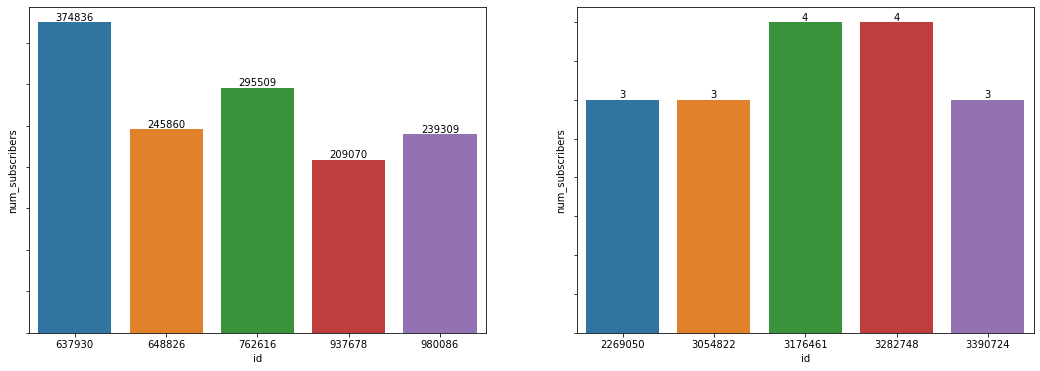

<Figure size 1000x400 with 0 Axes>

In [57]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
plt.figure(figsize=(5,2),dpi=200)
ax=sns.barplot(ax=axes[0],x='id',y='num_subscribers',data=df.sort_values('num_subscribers', ascending=False).head(5))
ax1=sns.barplot(ax=axes[1],x='id',y='num_subscribers',data=df.sort_values('num_subscribers', ascending=True).head(5))

ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.bar_label(ax.containers[0])

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=12)
ax1.bar_label(ax1.containers[0])

plt.show()

***Thus,id =637930(An Entire MBA in 1 Course:Award Winning Business) is the most subscibed course with 374836 subscribers<br>
and id = 2269050,3054822,3176461 is the least subscribed courses having count of only 3.***

In [58]:
#Top 3 courses information
df[df.isin([637930,762616,980086]).any(axis=1)]

,id,title,url,num_subscribers,avg_rating,num_reviews,num_of_lectures,practice_tests,created,published_time,discount_amount,detail_amount,year,month
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,295509,4.66019,78006,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455,8640,2016,4
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,374836,4.47080,41630,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455,8640,2016,1
19,980086,Deep Learning Prerequisites: The Numpy Stack i...,/course/deep-learning-prerequisites-the-numpy-...,239309,4.47381,18322,47,0,2016-10-10 06:34:58+00:00,2016-10-12 16:51:08+00:00,455,1280,2016,10


In [59]:
#Bottom 3 courses information
df[df.isin([2269050,3054822,3390724]).any(axis=1)]

,id,title,url,num_subscribers,avg_rating,num_reviews,num_of_lectures,practice_tests,created,published_time,discount_amount,detail_amount,year,month
9329,3054822,Crowdfunding Training Course: Everything You N...,/course/successful-crowdfunding-tonight/,3,5.0,3,34,0,2020-04-26 14:52:53+00:00,2020-06-14 00:07:16+00:00,455,1600,2020,6
9337,2269050,Ebay From Scratch in 2019 - Hidden Secrets Nev...,/course/ebay-from-scratch-in-2019-hidden-secre...,3,3.5,3,16,0,2019-03-13 03:05:09+00:00,2019-03-18 19:23:34+00:00,455,8640,2019,3
9395,3390724,Negotiation Mastery: Become A World Class Nego...,/course/negotiation-mastery-become-a-world-cla...,3,5.0,3,20,0,2020-08-03 22:42:06+00:00,2020-08-11 10:58:03+00:00,455,8640,2020,8


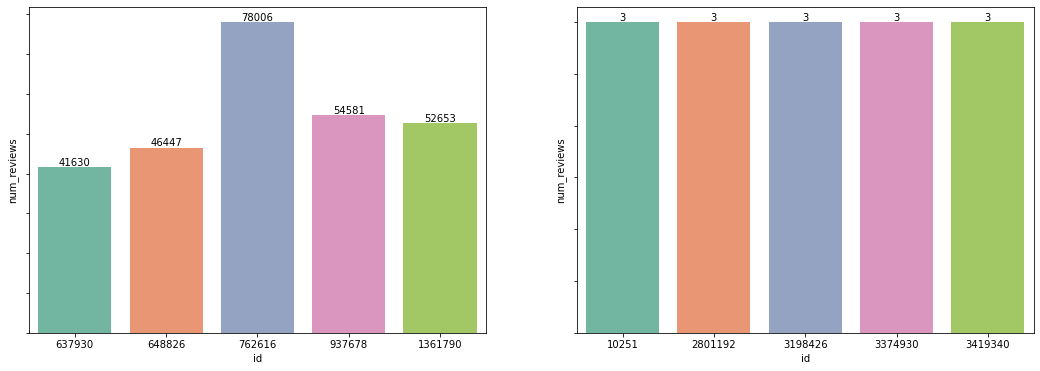

<Figure size 1000x400 with 0 Axes>

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
plt.figure(figsize=(5,2),dpi=200)
ax=sns.barplot(ax=axes[0],x='id',y='num_reviews',data=df.sort_values('num_reviews', ascending=False).head(5),palette='Set2')
ax1=sns.barplot(ax=axes[1],x='id',y='num_reviews',data=df.sort_values('num_reviews', ascending=True).head(5),palette='Set2')

ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.bar_label(ax.containers[0])

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=12)
ax1.bar_label(ax1.containers[0])

plt.show()

**Thus,id=762616(The Complete SQL Bootcamp 2020: Go from Zero..) is the most reviewed course with 78006 reviews<br>
and id =10251,2801192,3198426,3374930,3419340 courses have least review of 3.**

In [63]:
#Most reviewed courses information
df[df.isin([762616,937678,1361790,648826,637930]).any(axis=1)]

,id,title,url,num_subscribers,avg_rating,num_reviews,num_of_lectures,practice_tests,created,published_time,discount_amount,detail_amount,year,month
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,295509,4.66019,78006,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455,8640,2016,4
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,209070,4.58956,54581,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455,8640,2016,8
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,155282,4.59491,52653,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,455,8640,2017,11
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,245860,4.54407,46447,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455,8640,2016,1
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,374836,4.47080,41630,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455,8640,2016,1


In [64]:
#Least reviewed courses information
df[df.isin([1540120,1780630,1982358,2801192,3406088]).any(axis=1)]

,id,title,url,num_subscribers,avg_rating,num_reviews,num_of_lectures,practice_tests,created,published_time,discount_amount,detail_amount,year,month
9231,1982358,Management and Leadership for all levels,/course/management-and-leadership-course/,20,3.66667,3,35,0,2018-10-22 16:25:44+00:00,2018-10-24 01:10:11+00:00,455,1280,2018,10
9232,1540120,Introduction to Teams,/course/introduction-to-teams/,7,2.66667,3,15,0,2018-02-04 13:23:09+00:00,2018-02-07 14:15:38+00:00,455,8640,2018,2
9233,1780630,YouTube: Generate Passive Income With Simple R...,/course/youtube-generate-passive-income-with-s...,21,3.83333,3,12,0,2018-07-03 19:47:00+00:00,2018-07-16 21:51:23+00:00,455,1280,2018,7
9234,3406088,Introduction to Predictive Analytics on SAP An...,/course/introduction_to_predictive_analytics_u...,11,4.50000,3,21,0,2020-08-09 17:34:46+00:00,2020-08-23 23:36:34+00:00,455,1280,2020,8
9446,2801192,How to enter the US market?,/course/how-to-enter-the-us-market/,14,5.00000,3,5,0,2020-02-07 06:16:29+00:00,2020-02-11 22:10:35+00:00,455,6400,2020,2


In [65]:
year_count = df.groupby('year').count()

<AxesSubplot:xlabel='year', ylabel='id'>

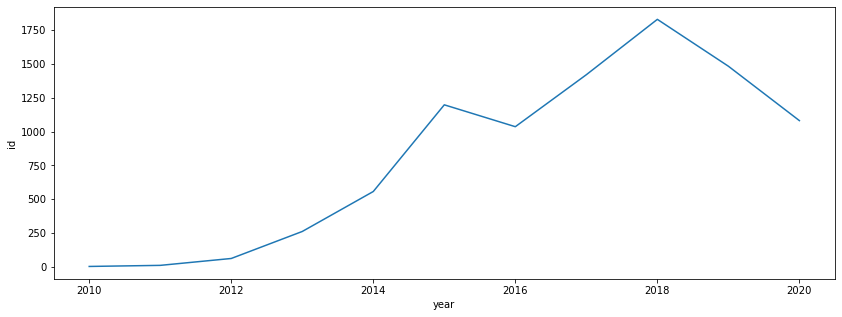

In [70]:
plt.figure(figsize=(14,5))
sns.lineplot(x='year',y='id',data=year_count)

**Number of cousre increses with every year.However a dip is found in the year 2016,2019 and 2020.<br>
Most number of courses sold in the year 2020**


<AxesSubplot:xlabel='discount_amount', ylabel='id'>

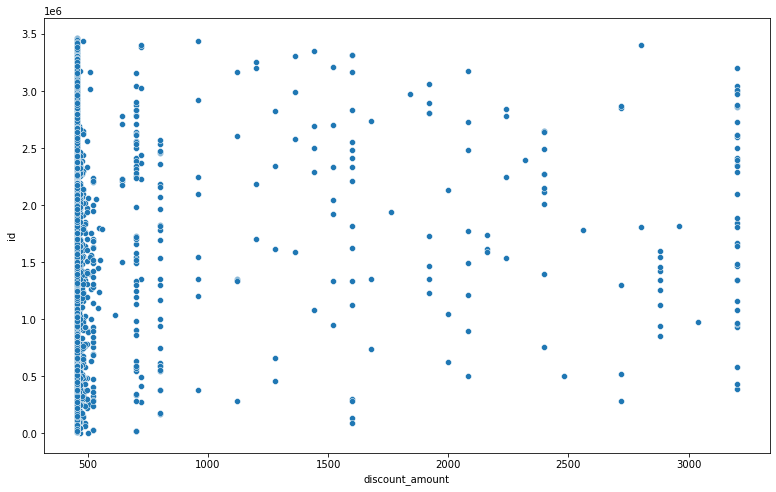

In [78]:
plt.figure(figsize=(13,8))
sns.scatterplot(x='discount_amount',y='id',data=df)

**Thus, most of the course offered discount of around 500 rupees and the max discount offered is Rs. 3200 by 36 courses.**

<AxesSubplot:xlabel='Count', ylabel='practice_tests'>

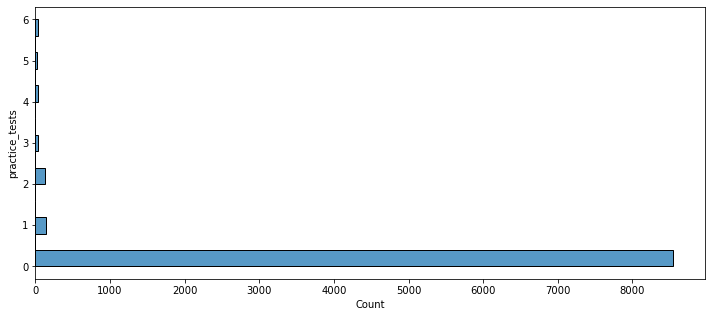

In [81]:
plt.figure(figsize=(12,5))
sns.histplot(y='practice_tests',data=df)

**8548 courses has zero practice tests and maximum 5 practice tests are available for 25 courses.**

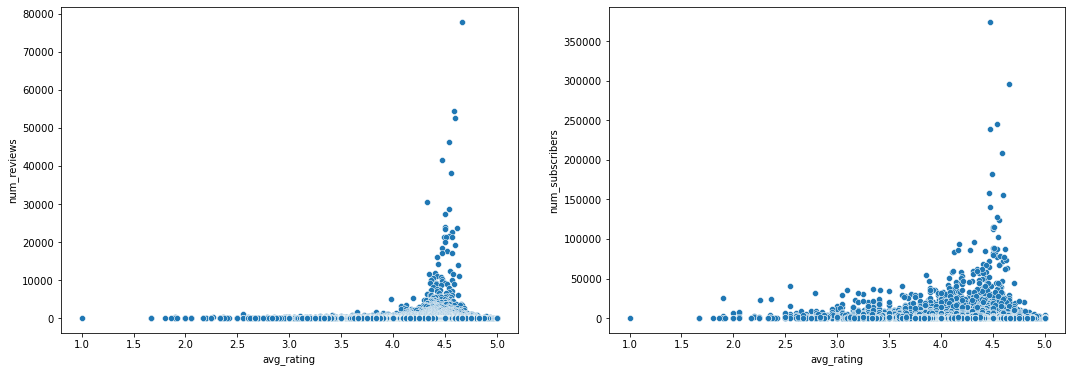

In [88]:
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.scatterplot(ax=axes[0],data=df,x=df['avg_rating'],y=df['num_reviews'])
sns.scatterplot(ax=axes[1],data=df,x=df['avg_rating'],y=df['num_subscribers'])
plt.show()

<AxesSubplot:xlabel='num_of_lectures', ylabel='num_subscribers'>

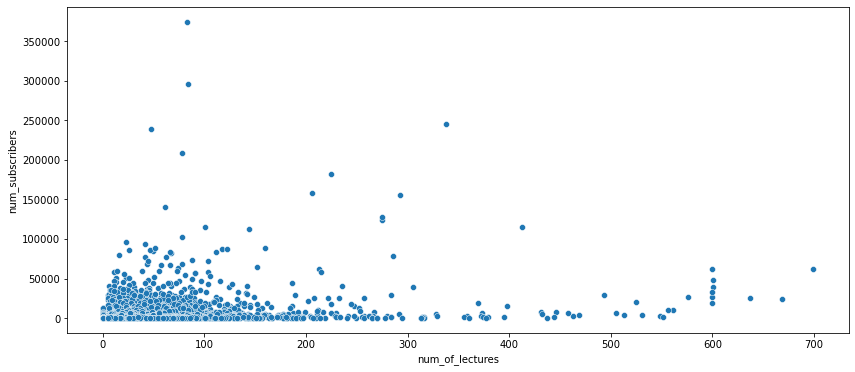

In [82]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='num_of_lectures',y='num_subscribers',data=df)

**Thus,maximum 699 lectures are there in one course<br>
and minimum 0 lectures are there in several courses**

In [83]:
df['perc_of_discount'] = (df['discount_amount']/df['detail_amount'])*100

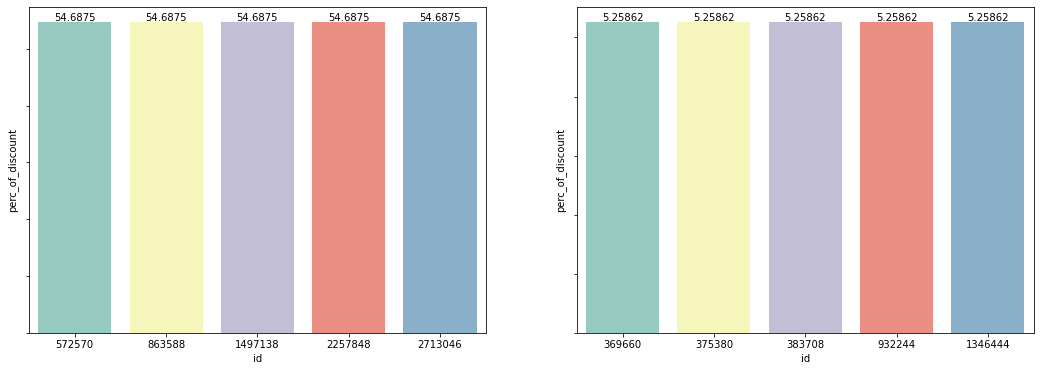

<Figure size 1440x432 with 0 Axes>

In [87]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
plt.figure(figsize=(20,6))
ax=sns.barplot(ax=axes[0],y='perc_of_discount',x='id',data=df.sort_values('perc_of_discount', ascending=False).head(5),palette='Set3')
ax1=sns.barplot(ax=axes[1],y='perc_of_discount',x='id',data=df.sort_values('perc_of_discount', ascending=True).head(5),palette='Set3')

ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.bar_label(ax.containers[0])

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=12)
ax1.bar_label(ax1.containers[0])


plt.show()

**Thus course having id = 572570,863588,1497138,2257848,2713046 etc having maximum discount of around 55%<br>
and course having id = 369660,375380,383708,932244,1346444 etc having minimum discount of 5%.**